In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification

from numpy import where

import scipy.stats as stats
from scipy.special import inv_boxcox   
import os #we will use the function listdir to list files in a folder
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('regression_data_headers.csv')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long1,sqft_living15,sqft_lot15,price
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [54]:
#Show the dataframe shape.

In [3]:
len(data)

21596

In [4]:
#Show DataFrame info.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  int64  
 8   view           21596 non-null  int64  
 9   condition1     21596 non-null  int64  
 10  grade          21596 non-null  int64  
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  int64  
 13  yr_built       21596 non-null  int64  
 14  yr_renovated   21596 non-null  int64  
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long1          21596 non-null  float64
 18  sqft_l

In [58]:
#Describe DataFrame.

In [6]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long1,sqft_living15,sqft_lot15,price
count,2.159600e+04,21596.000000,21596.000000,21596.00000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,2.159600e+04
mean,4.580356e+09,3.373217,2.115878,2080.36354,1.509985e+04,1.494119,0.007548,0.234303,3.409844,7.657946,1788.625023,291.738516,1971.000417,84.468698,98077.947212,47.560095,-122.213981,1986.650259,12758.612660,5.403113e+05
std,2.876750e+09,0.926317,0.768965,918.10694,4.141355e+04,0.539685,0.086551,0.766406,0.650555,1.173218,827.768566,442.673598,29.375712,401.830330,53.509980,0.138555,0.140726,685.232209,27275.030548,3.673703e+05
min,1.000102e+06,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.00000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.00000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308950e+09,4.000000,2.500000,2550.00000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [7]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long1,sqft_living15,sqft_lot15,price
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [7]:
#check nan values

In [8]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition1       0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long1            0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [9]:
data['yr_renovated'].unique()

array([1991,    0, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [10]:
target = data['price']

In [11]:
target.head()

0     538000
1     180000
2     604000
3     510000
4    1230000
Name: price, dtype: int64

In [12]:
date_sold = data['date']

In [13]:
data['renovated'] = np.where(data['yr_renovated']>0, 1, 0)

In [14]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long1,sqft_living15,sqft_lot15,price,renovated
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,1
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,0
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,0
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,0
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  int64  
 8   view           21596 non-null  int64  
 9   condition1     21596 non-null  int64  
 10  grade          21596 non-null  int64  
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  int64  
 13  yr_built       21596 non-null  int64  
 14  yr_renovated   21596 non-null  int64  
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long1          21596 non-null  float64
 18  sqft_l

In [16]:
data.drop(['yr_renovated'], axis =1, inplace=True)

In [17]:
data.drop(['date'], axis =1, inplace=True)

In [18]:
data['zipcode'] = data['zipcode'].apply(str)

In [19]:
location = data[['long1','lat']]

In [20]:
data.drop(['long1', 'lat'], axis =1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  int64  
 7   view           21596 non-null  int64  
 8   condition1     21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  int64  
 12  yr_built       21596 non-null  int64  
 13  zipcode        21596 non-null  object 
 14  sqft_living15  21596 non-null  int64  
 15  sqft_lot15     21596 non-null  int64  
 16  price          21596 non-null  int64  
 17  renovated      21596 non-null  int64  
dtypes: flo

In [22]:
data.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,price,renovated
0,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,538000,1
1,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062,180000,0
2,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,604000,0
3,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,510000,0
4,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,98053,4760,101930,1230000,0


In [23]:
def filter_variables(data):
    categorical = data.select_dtypes('object')
    discrete_data = data.select_dtypes('int64','int32')
    continous_data = data.select_dtypes('float64')
    return categorical, discrete_data, continous_data

In [24]:
categorical, discrete_data, continous_data = filter_variables(data)

In [25]:
discrete_data.head()

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,renovated
0,6414100192,3,2570,7242,0,0,3,7,2170,400,1951,1690,7639,538000,1
1,5631500400,2,770,10000,0,0,3,6,770,0,1933,2720,8062,180000,0
2,2487200875,4,1960,5000,0,0,5,7,1050,910,1965,1360,5000,604000,0
3,1954400510,3,1680,8080,0,0,3,8,1680,0,1987,1800,7503,510000,0
4,7237550310,4,5420,101930,0,0,3,11,3890,1530,2001,4760,101930,1230000,0


In [26]:
continous_data.head()

,bathrooms,floors
0,2.25,2.0
1,1.00,1.0
2,3.00,1.0
3,2.00,1.0
4,4.50,1.0


In [27]:
categorical.head()

,zipcode
0,98125
1,98028
2,98136
3,98074
4,98053


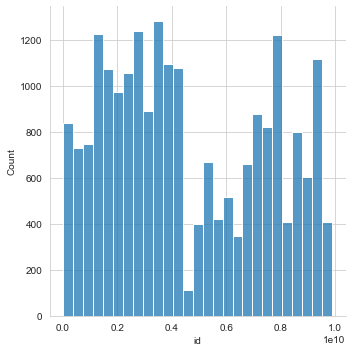

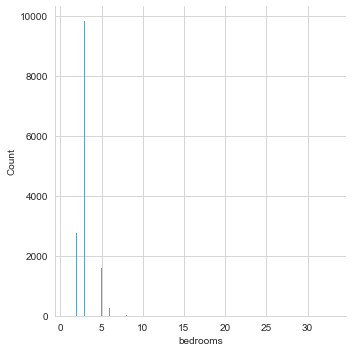

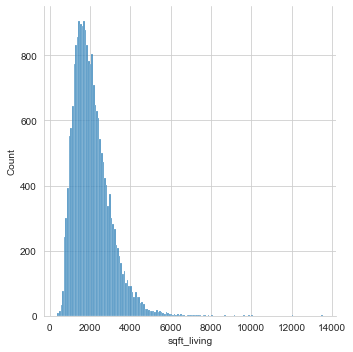

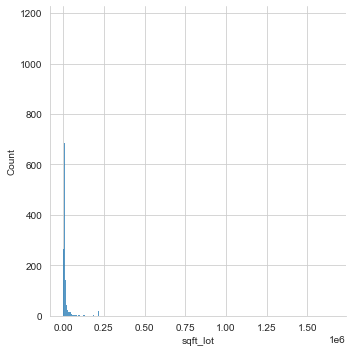

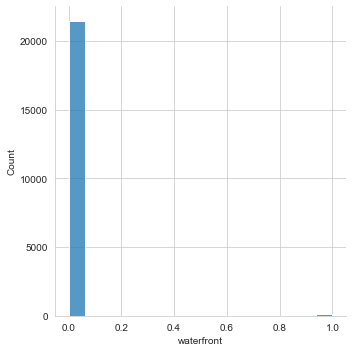

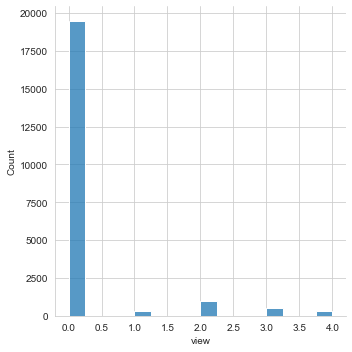

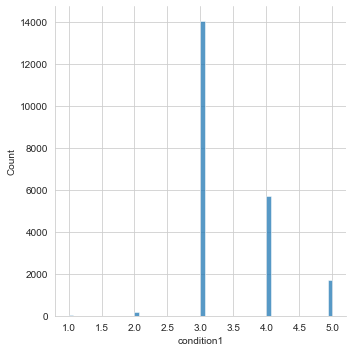

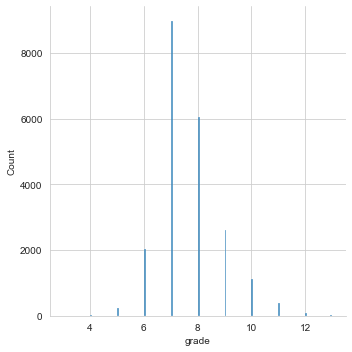

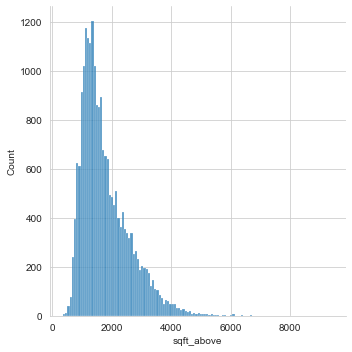

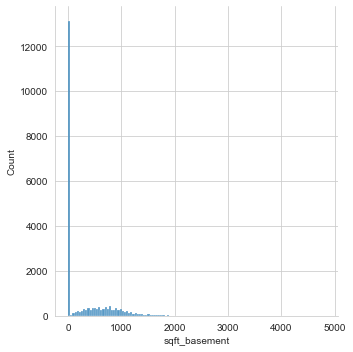

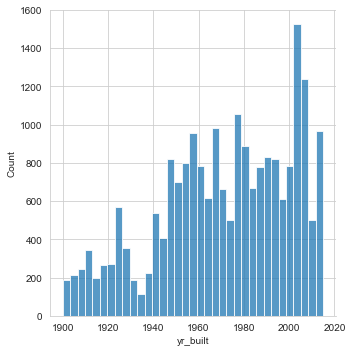

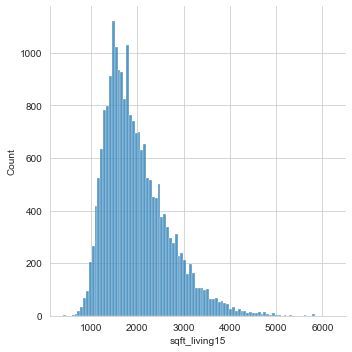

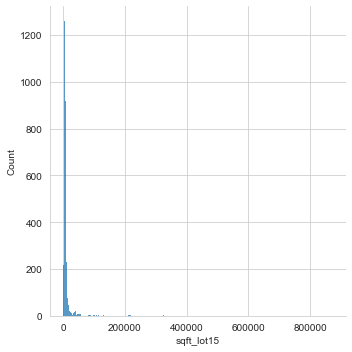

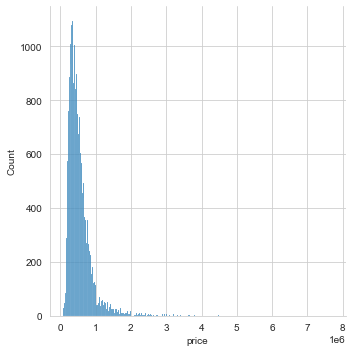

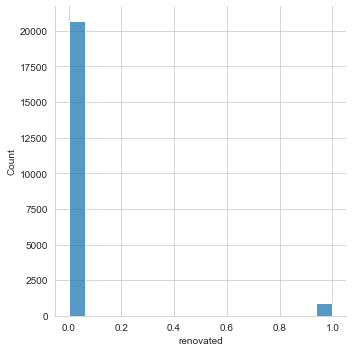

In [28]:
def discrete_plot(data):
    for col in data:
        sns.displot(data[col])
        plt.show()
    
discrete_plot(discrete_data)

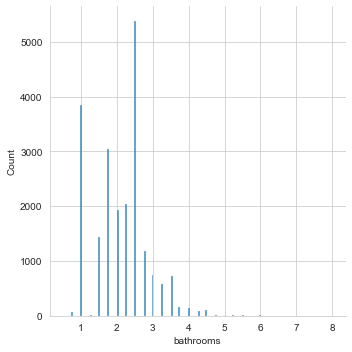

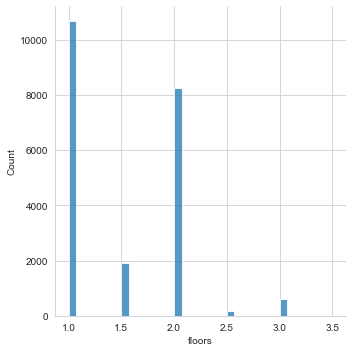

In [29]:
def continous_plot(data):
    for col in data:
        sns.displot(data[col])
        plt.show()
    
continous_plot(continous_data)

In [57]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: #
        return np.log(x)
    else:
        return np.NAN

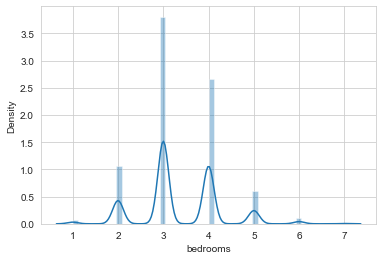

In [58]:
data['bedrooms'] = data['bedrooms'].fillna(np.mean(data['bedrooms']))
sns.distplot(data['bedrooms'])
plt.show()

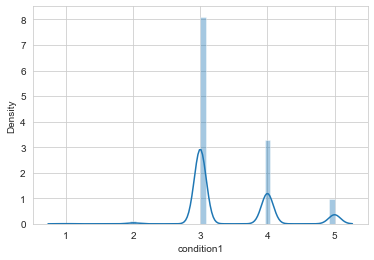

In [59]:
data['condition1'] = data['condition1'].fillna(np.mean(data['condition1']))
sns.distplot(data['condition1'])
plt.show()

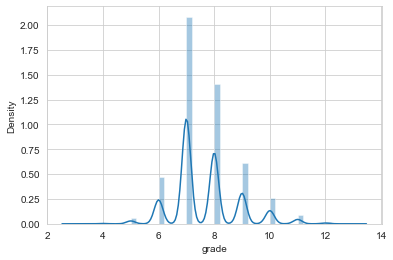

In [60]:
data['grade'] = data['grade'].fillna(np.mean(data['grade']))
sns.distplot(data['grade'])
plt.show()

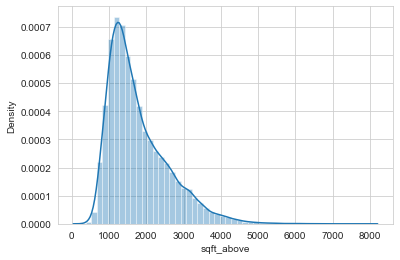

In [61]:
data['sqft_above'] = data['sqft_above'].fillna(np.mean(data['sqft_above']))
sns.distplot(data['sqft_above'])
plt.show()

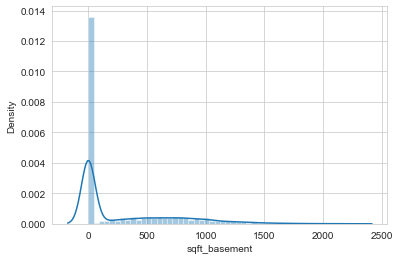

In [62]:
data['sqft_basement'] = data['sqft_basement'].fillna(np.mean(data['sqft_basement']))
sns.distplot(data['sqft_basement'])
plt.show()

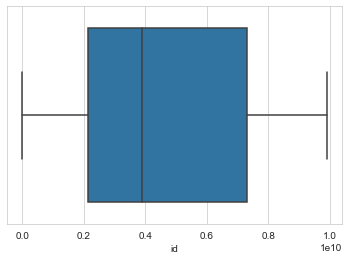

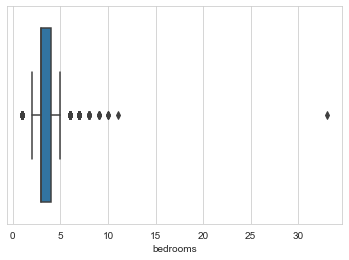

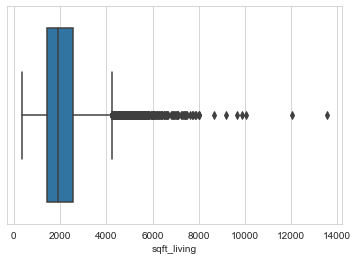

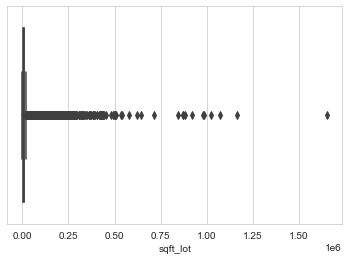

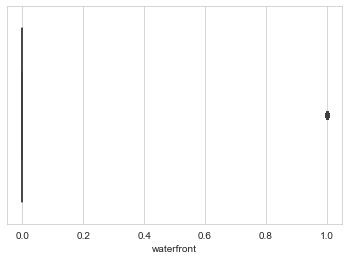

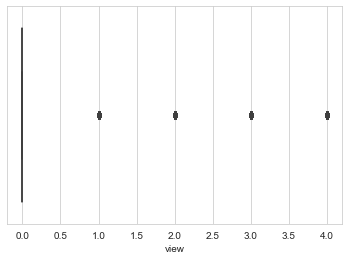

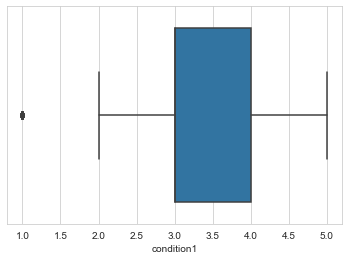

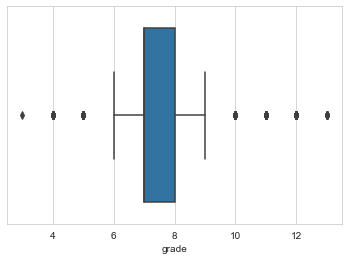

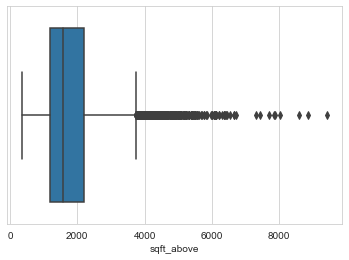

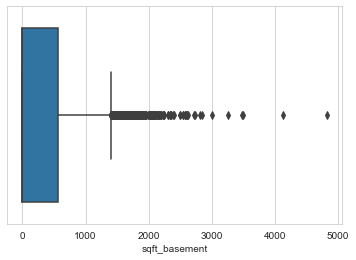

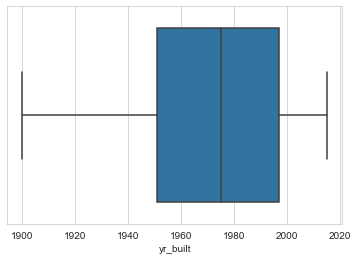

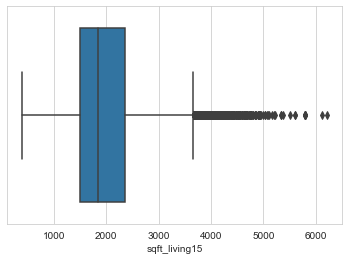

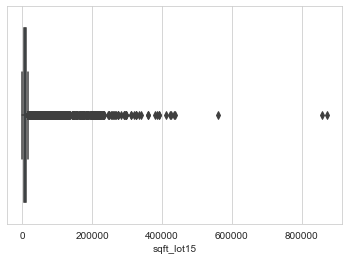

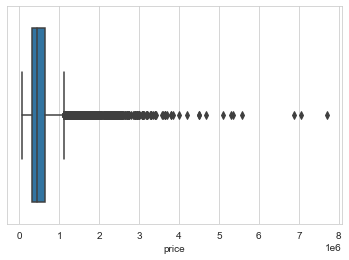

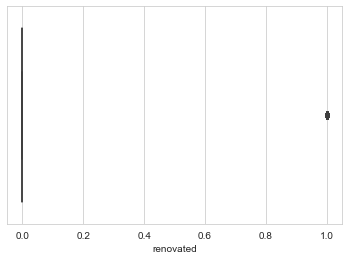

In [30]:
for col in discrete_data:
    sns.boxplot (discrete_data[col])
    plt.show()

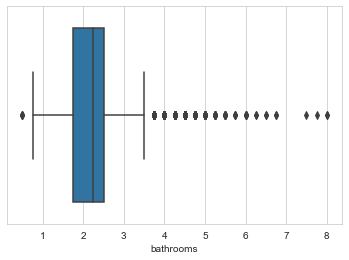

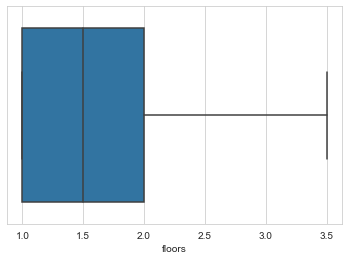

In [31]:
for col in continous_data:
    sns.boxplot (continous_data[col])
    plt.show()

In [37]:
#outliers treatment

In [32]:
len(data)

21596

In [33]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (3 * IQR)
 upper_range = Q3 + (3 * IQR)
 return lower_range,upper_range

In [39]:
lowerbound,upperbound = outlier_treatment(data.bathrooms)

In [40]:
data[(data.bathrooms < lowerbound) | (data.bathrooms > upperbound)]
data.drop(data[(data.bathrooms > upperbound) | (data.bathrooms < lowerbound) ].index, inplace=True)

In [41]:
lowerbound,upperbound = outlier_treatment(data.bedrooms)
data.drop(data[(data.bedrooms > upperbound) | (data.bedrooms < lowerbound) ].index, inplace=True)

In [42]:
lowerbound,upperbound = outlier_treatment(data.sqft_basement)
data.drop(data[(data.sqft_basement > upperbound) | (data.sqft_basement < lowerbound) ].index, inplace=True)

In [43]:
lowerbound,upperbound = outlier_treatment(data.condition1)
data.drop(data[(data.condition1 > upperbound) | (data.condition1 < lowerbound) ].index, inplace=True)

In [44]:
len(data)

21494

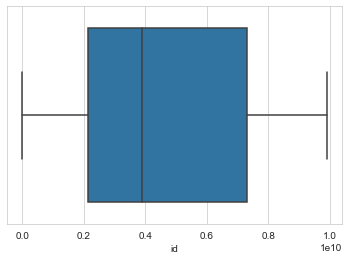

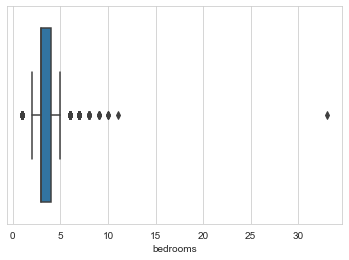

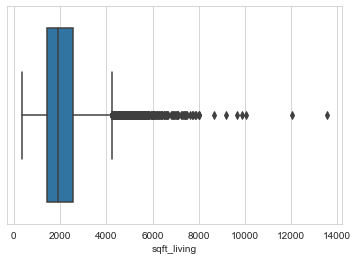

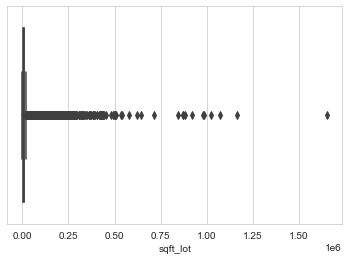

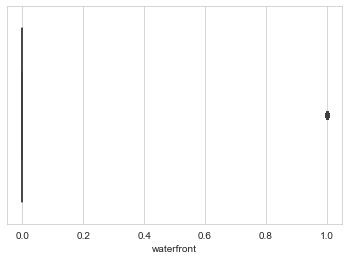

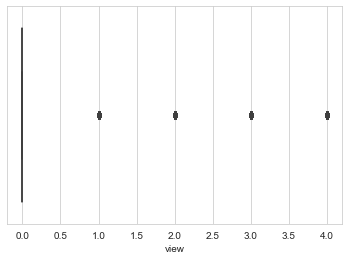

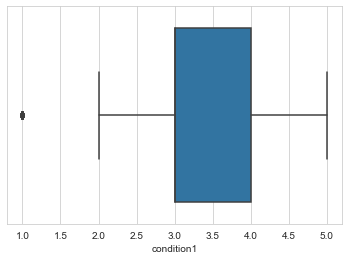

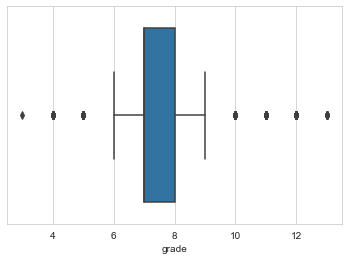

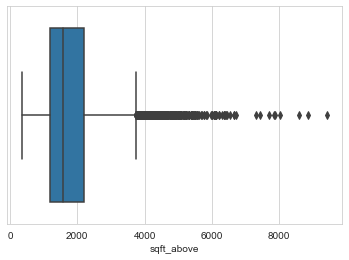

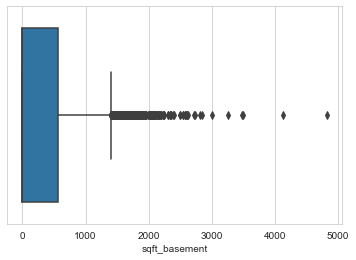

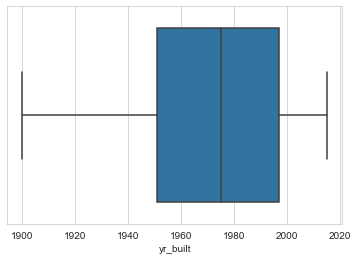

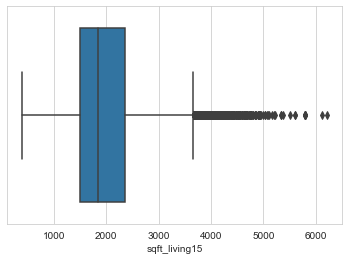

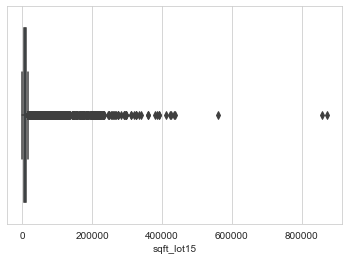

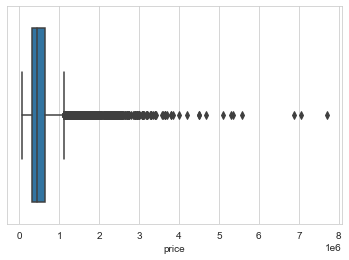

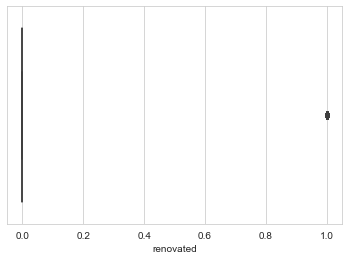

In [63]:
for col in discrete_data:
    sns.boxplot (discrete_data[col])
    plt.show()

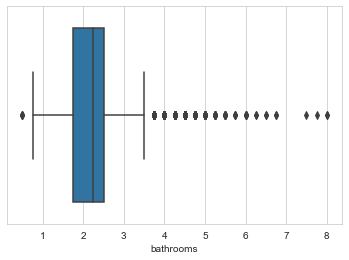

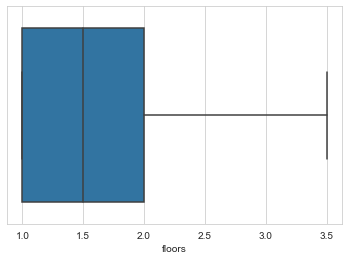

In [64]:
for col in continous_data:
    sns.boxplot (continous_data[col])
    plt.show()

In [46]:
#correlation

In [45]:
discrete_data.corr()

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,renovated
id,1.000000,0.001167,-0.012201,-0.131904,-0.002724,0.011549,-0.023778,0.008212,-0.010770,-0.005166,0.021640,-0.002662,-0.138549,-0.016737,-0.016953
bedrooms,0.001167,1.000000,0.578209,0.032467,-0.006835,0.080002,0.026484,0.356556,0.479380,0.302800,0.155661,0.393398,0.030685,0.308778,0.018096
sqft_living,-0.012201,0.578209,1.000000,0.173447,0.103853,0.284702,-0.059475,0.762776,0.876445,0.435114,0.318137,0.756391,0.184335,0.701906,0.055030
sqft_lot,-0.131904,0.032467,0.173447,1.000000,0.021631,0.074897,-0.008836,0.114726,0.184134,0.015411,0.052941,0.144756,0.718203,0.089869,0.007786
waterfront,-0.002724,-0.006835,0.103853,0.021631,1.000000,0.401970,0.016609,0.082886,0.072107,0.080557,-0.026155,0.086505,0.030780,0.266400,0.093281
view,0.011549,0.080002,0.284702,0.074897,0.401970,1.000000,0.045991,0.251722,0.167601,0.277072,-0.053645,0.280674,0.072900,0.397366,0.104093
condition1,-0.023778,0.026484,-0.059475,-0.008836,0.016609,0.045991,1.000000,-0.146915,-0.158929,0.173833,-0.361613,-0.093103,-0.003134,0.036032,-0.060316
grade,0.008212,0.356556,0.762776,0.114726,0.082886,0.251722,-0.146915,1.000000,0.756068,0.168206,0.447857,0.713863,0.120975,0.667945,0.013848
sqft_above,-0.010770,0.479380,0.876445,0.184134,0.072107,0.167601,-0.158929,0.756068,1.000000,-0.052179,0.424027,0.731759,0.195071,0.605357,0.023137
sqft_basement,-0.005166,0.302800,0.435114,0.015411,0.080557,0.277072,0.173833,0.168206,-0.052179,1.000000,-0.133083,0.200421,0.017542,0.323781,0.070868


In [46]:
continous_data.corr()

,bathrooms,floors
bathrooms,1.000000,0.502555
floors,0.502555,1.000000


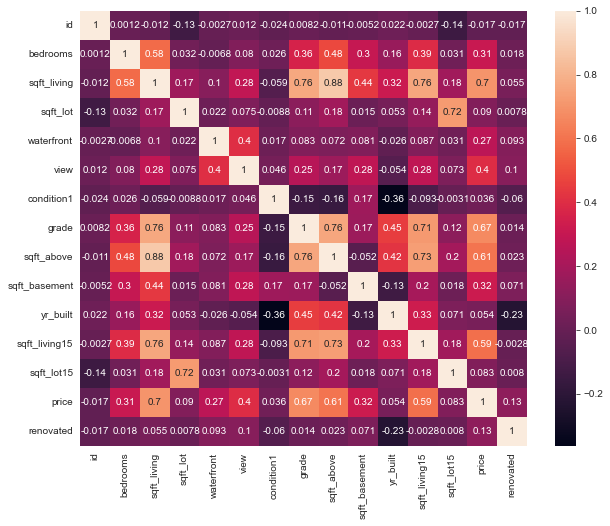

In [47]:
corr_matrix=discrete_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

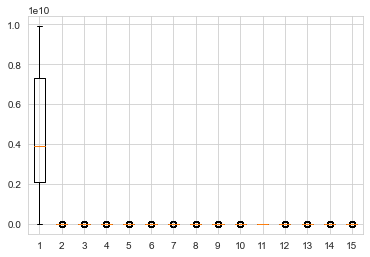

<Figure size 720x504 with 0 Axes>

In [48]:
plt.boxplot(discrete_data)
fig = plt.figure(figsize =(10, 7))
plt.show()

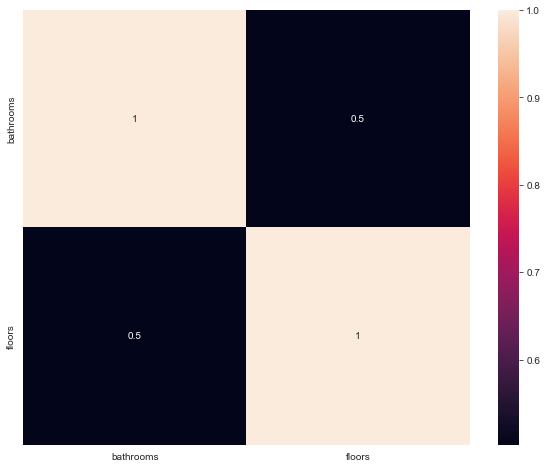

In [49]:
corr_matrix=continous_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [50]:
num = data.select_dtypes(np.number)
num.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,renovated
0,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,538000,1
1,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,180000,0
2,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,604000,0
3,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,510000,0
4,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,4760,101930,1230000,0


In [122]:
num.floors.unique()

array([2. , 1. , 1.5, 3. , 2.5, 3.5])

In [90]:
y = num['price']
X = num.drop(['price','id'], axis = 1)

In [123]:
def modeling_1(y, X, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [93]:
predictions1, y_test1, r2_1 = modeling_1(y, X, test_size=0.24)

R2 = 0.65
RMSE = 207918.86
MSE = 43230252705.07
MAE = 136525.68


In [94]:
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [95]:
results = diff_df(y_test, predictions1)
results

,true,pred,diff
21513,3000000,1.230542e+06,1.769458e+06
20137,2950000,1.207757e+06,1.742243e+06
2082,3850000,2.180592e+06,1.669408e+06
5443,2850000,1.342953e+06,1.507047e+06
13953,3400000,1.894096e+06,1.505904e+06
19220,2720000,1.214119e+06,1.505881e+06
14016,2890000,1.429328e+06,1.460672e+06
18777,2680000,1.225888e+06,1.454112e+06
7925,2900000,1.452098e+06,1.447902e+06
6501,3650000,2.235288e+06,1.414712e+06


In [96]:
def modeling(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [124]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=5)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.65
R2 adjusted = 0.65
RMSE = 207918.86
MSE = 43230252705.07
MAE = 136525.68
KNeighborsRegressor() metrics are: 
R2 = 0.49
R2 adjusted = 0.48
RMSE = 252060.75
MSE = 63534620960.93
MAE = 157827.22


In [98]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [99]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10), MLPRegressor(max_iter=100)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.65
R2 adjusted = 0.65
RMSE = 207918.86
MSE = 43230252705.07
MAE = 136525.68
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.52
R2 adjusted = 0.51
RMSE = 244682.52
MSE = 59869536257.77
MAE = 152514.59
MLPRegressor(max_iter=100) metrics are: 
R2 = 0.48
R2 adjusted = 0.48
RMSE = 252523.66
MSE = 63768200564.51
MAE = 168847.21


In [100]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

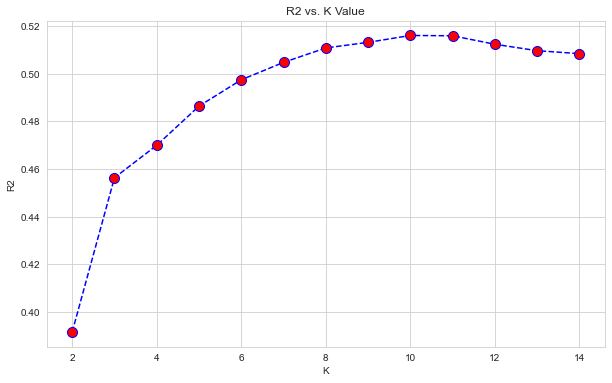

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [102]:
k_predictions, k_y_test, k_r2 = modeling(y, X, models=[KNeighborsRegressor(n_neighbors=10)], test_size=0.24)

KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.52
R2 adjusted = 0.51
RMSE = 244682.52
MSE = 59869536257.77
MAE = 152514.59


In [103]:
LR_predictions, LR_y_test, LR_r2 = modeling(y, X, models=[LinearRegression()],test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.65
R2 adjusted = 0.65
RMSE = 207918.86
MSE = 43230252705.07
MAE = 136525.68


In [104]:
MLP_predictions, y_test, MLP_r2 = modeling(y, X, models=[MLPRegressor(max_iter=250)],test_size=0.24)

MLPRegressor(max_iter=250) metrics are: 
R2 = 0.52
R2 adjusted = 0.51
RMSE = 244656.61
MSE = 59856855348.86
MAE = 162942.0


In [105]:
k_results = diff_df(y_test, k_predictions)
k_results

,true,pred,diff
13953,3400000,841925.0,2558075.0
18184,3300000,764100.0,2535900.0
6501,3650000,1212000.0,2438000.0
2082,3850000,1728300.0,2121700.0
20137,2950000,843200.0,2106800.0
3866,2950000,915150.0,2034850.0
5960,2730000,733238.8,1996761.2
7305,3100000,1203750.0,1896250.0
18313,2920000,1065030.0,1854970.0
7925,2900000,1136197.5,1763802.5


In [106]:
LR_results = diff_df(y_test, LR_predictions)
LR_results

,true,pred,diff
21513,3000000,1.230542e+06,1.769458e+06
20137,2950000,1.207757e+06,1.742243e+06
2082,3850000,2.180592e+06,1.669408e+06
5443,2850000,1.342953e+06,1.507047e+06
13953,3400000,1.894096e+06,1.505904e+06
19220,2720000,1.214119e+06,1.505881e+06
14016,2890000,1.429328e+06,1.460672e+06
18777,2680000,1.225888e+06,1.454112e+06
7925,2900000,1.452098e+06,1.447902e+06
6501,3650000,2.235288e+06,1.414712e+06


In [107]:
MLP_results = diff_df(y_test, MLP_predictions)
MLP_results

,true,pred,diff
2082,3850000,1.575899e+06,2.274101e+06
13953,3400000,1.167826e+06,2.232174e+06
18184,3300000,1.158894e+06,2.141106e+06
6501,3650000,1.563493e+06,2.086507e+06
7305,3100000,1.053735e+06,2.046265e+06
20137,2950000,1.059345e+06,1.890655e+06
18540,2950000,1.131814e+06,1.818186e+06
19220,2720000,1.052934e+06,1.667066e+06
21513,3000000,1.372099e+06,1.627901e+06
11244,3000000,1.378896e+06,1.621104e+06


In [108]:
def we_like_to_see(results):
    beautiful_graph = sns.regplot(results['true'], results['pred'])
    return beautiful_graph

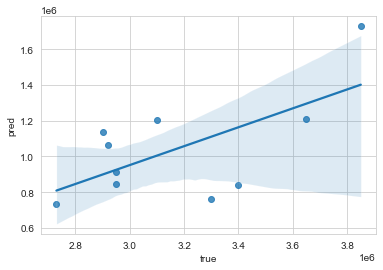

In [109]:
k_beautiful_graph = we_like_to_see(k_results)

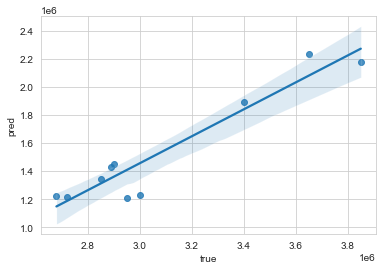

In [110]:
LR_beautiful_graph = we_like_to_see(LR_results)

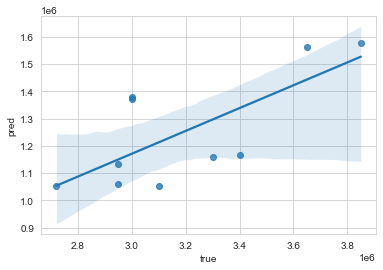

In [111]:
MLP_beautiful_graph = we_like_to_see(MLP_results)

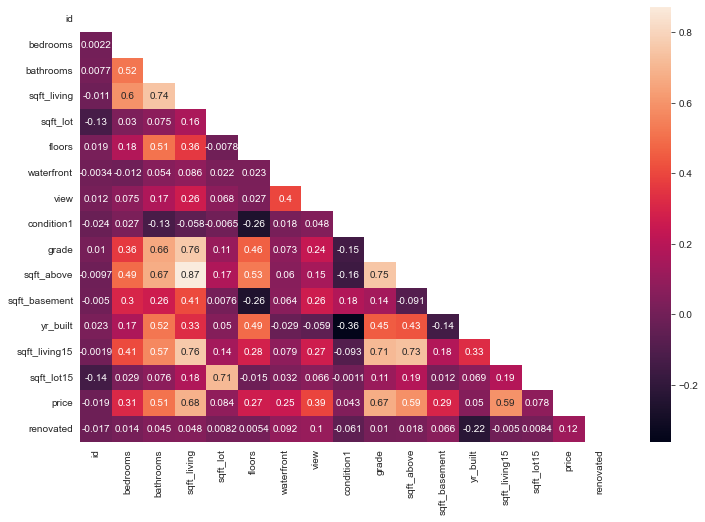

In [113]:
mask = np.zeros_like(num.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(num.corr(), mask=mask, annot=True)
plt.show()

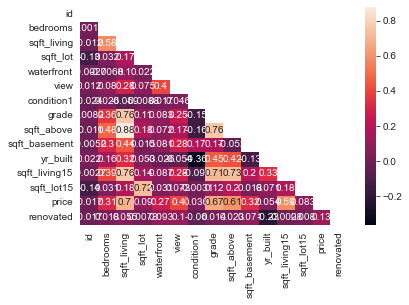

In [114]:
mask = np.zeros_like(discrete_data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(discrete_data.corr(), mask=mask, annot=True)
plt.show()

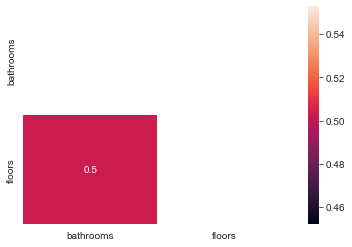

In [115]:
mask = np.zeros_like(continous_data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(continous_data.corr(), mask=mask, annot=True)
plt.show()

In [118]:
no_continous = data.drop(columns=continous_data.columns, axis=1)
no_continous

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,price,renovated
0,6414100192,3,2570,7242,0,0,3,7,2170,400,1951,98125,1690,7639,538000,1
1,5631500400,2,770,10000,0,0,3,6,770,0,1933,98028,2720,8062,180000,0
2,2487200875,4,1960,5000,0,0,5,7,1050,910,1965,98136,1360,5000,604000,0
3,1954400510,3,1680,8080,0,0,3,8,1680,0,1987,98074,1800,7503,510000,0
4,7237550310,4,5420,101930,0,0,3,11,3890,1530,2001,98053,4760,101930,1230000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,263000018,3,1530,1131,0,0,3,8,1530,0,2009,98103,1530,1509,360000,0
21592,6600060120,4,2310,5813,0,0,3,8,2310,0,2014,98146,1830,7200,400000,0
21593,1523300141,2,1020,1350,0,0,3,7,1020,0,2009,98144,1020,2007,402101,0
21594,291310100,3,1600,2388,0,0,3,8,1600,0,2004,98027,1410,1287,400000,0


In [120]:
no_cont_y = no_continous['price']
no_cont_X = no_continous.drop('price', axis=1)
no_cont_pred, no_cont_y_test, no_cont_r2 = modeling(no_cont_y, no_cont_X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=6), MLPRegressor(max_iter=250)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.64
R2 adjusted = 0.64
RMSE = 209673.49
MSE = 43962971356.1
MAE = 138906.5
KNeighborsRegressor(n_neighbors=6) metrics are: 
R2 = 0.4
R2 adjusted = 0.4
RMSE = 272174.03
MSE = 74078702807.17
MAE = 156421.07
MLPRegressor(max_iter=250) metrics are: 
R2 = -1.36
R2 adjusted = -1.37
RMSE = 540231.71
MSE = 291850304127.68
MAE = 418009.63
